**Imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind, mannwhitneyu

In [2]:
movies_df = pd.read_csv("../input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms.csv")

In [3]:
movies_df = movies_df.drop(["Unnamed: 0", "ID"], axis=1)

In [4]:
movies_df.head()

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,The Irishman,2019,18+,98/100,1,0,0,0,0
1,Dangal,2016,7+,97/100,1,0,0,0,0
2,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,Roma,2018,18+,94/100,1,0,0,0,0


In [5]:
# Calculate the number of movies for each platform
movie_counts = {
    "Netflix": movies_df["Netflix"].sum(),
    "Hulu": movies_df["Hulu"].sum(),
    "Prime Video": movies_df["Prime Video"].sum(),
    "Disney+": movies_df["Disney+"].sum()
}

# Display the counts
print("Number of movies on each platform:")
for platform, count in movie_counts.items():
    print(f"{platform}: {count}")
    
print("*******************")

print("Total number of entries in the dataset:", len(movies_df))
print("Movies without age ratings:", movies_df[movies_df["Age"].isnull()].shape[0])
print("Movies without Rotten Tomatoes scores:", movies_df[movies_df["Rotten Tomatoes"].isnull()].shape[0])
print("*******************")

total_movies = {
    "Total Movies": len(movies_df),
    "Netflix": movies_df["Netflix"].sum(),
    "Hulu": movies_df["Hulu"].sum(),
    "Prime Video": movies_df["Prime Video"].sum(),
    "Disney+": movies_df["Disney+"].sum()
}

for platforms, counts in total_movies.items():
    print(f"{platforms}: {counts}")
    
print("*******************")
print("Number of duplicate entries in the dataset:", movies_df.duplicated().sum())

Number of movies on each platform:
Netflix: 3695
Hulu: 1047
Prime Video: 4113
Disney+: 922
*******************
Total number of entries in the dataset: 9515
Movies without age ratings: 4177
Movies without Rotten Tomatoes scores: 7
*******************
Total Movies: 9515
Netflix: 3695
Hulu: 1047
Prime Video: 4113
Disney+: 922
*******************
Number of duplicate entries in the dataset: 0


In [6]:
palette_colors = ["#72efdd", "#a2d2ff", "#ff6b6b","#95d5b2"]

In [7]:
custom_palette = sns.set_palette(sns.color_palette(palette_colors))

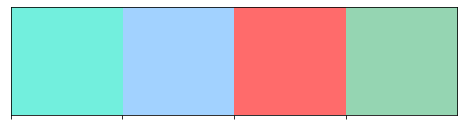

In [8]:
sns.palplot(sns.color_palette(palette_colors), size=2)

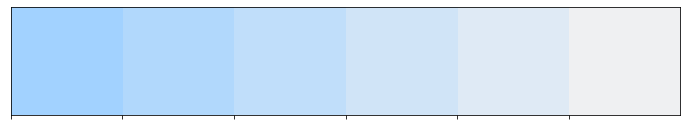

In [9]:
netflix_palette = sns.light_palette(palette_colors[1], reverse=True)
sns.palplot(sns.color_palette(netflix_palette), size=2)

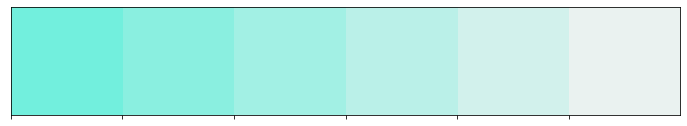

In [10]:
prime_palette = sns.light_palette(palette_colors[0], reverse=True)
sns.palplot(sns.color_palette(prime_palette), size=2)

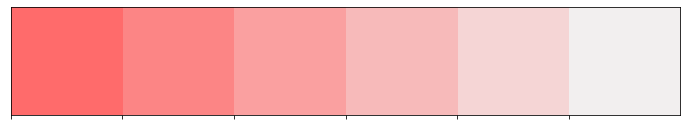

In [11]:
hulu_palette = sns.light_palette(palette_colors[2], reverse=True)
sns.palplot(sns.color_palette(hulu_palette), size=2)

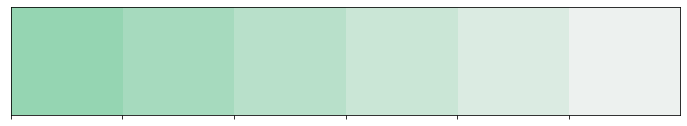

In [12]:
disney_palette = sns.light_palette(palette_colors[3], reverse=True)
sns.palplot(sns.color_palette(disney_palette), size=2)

In [14]:
movie_count = [movies_df[col].sum() for col in ["Netflix", "Hulu", "Prime Video", "Disney+"]]

In [15]:
platform_movies_list = [movies_df[(movies_df[col]==1)] for col in ["Netflix", "Hulu", "Prime Video", "Disney+"]]

In [16]:
movies_count_per_age = [df["Age"].value_counts().to_dict() for i, df in enumerate(platform_movies_list)]
movies_count_per_age

[{'18+': 877, '13+': 404, '7+': 322, '16+': 151, 'all': 144},
 {'18+': 383, '13+': 175, '7+': 98, 'all': 36, '16+': 26},
 {'18+': 1090, '7+': 421, '13+': 397, 'all': 160, '16+': 97},
 {'all': 370, '7+': 278, '13+': 70, '16+': 4, '18+': 3}]

# **Donut Plot**

In [17]:
def donut_plot(splot, data, label, title):
    plt.subplot(splot)
    donut_center_circle = plt.Circle((0,0), 0.5, color="black", fc="white", linewidth=2)
    plt.pie(data, 
            labels=label, 
            colors=palette_colors,
            autopct="%.2f%%",
            shadow=True
           )
    current_fig = plt.gcf()
    current_fig.gca().add_artist(donut_center_circle)
    plt.title(title)

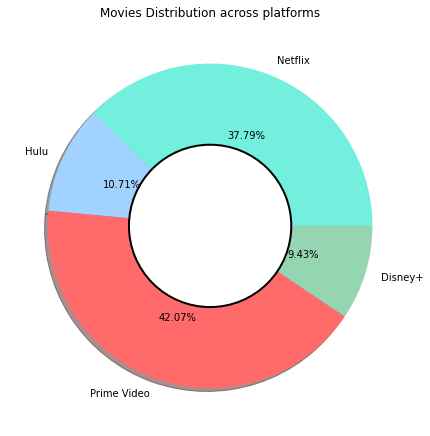

In [18]:
plt.figure(figsize=(16, 8))
donut_plot(121, movie_count, ["Netflix", "Hulu", "Prime Video", "Disney+"], "Movies Distribution across platforms")
plt.show()

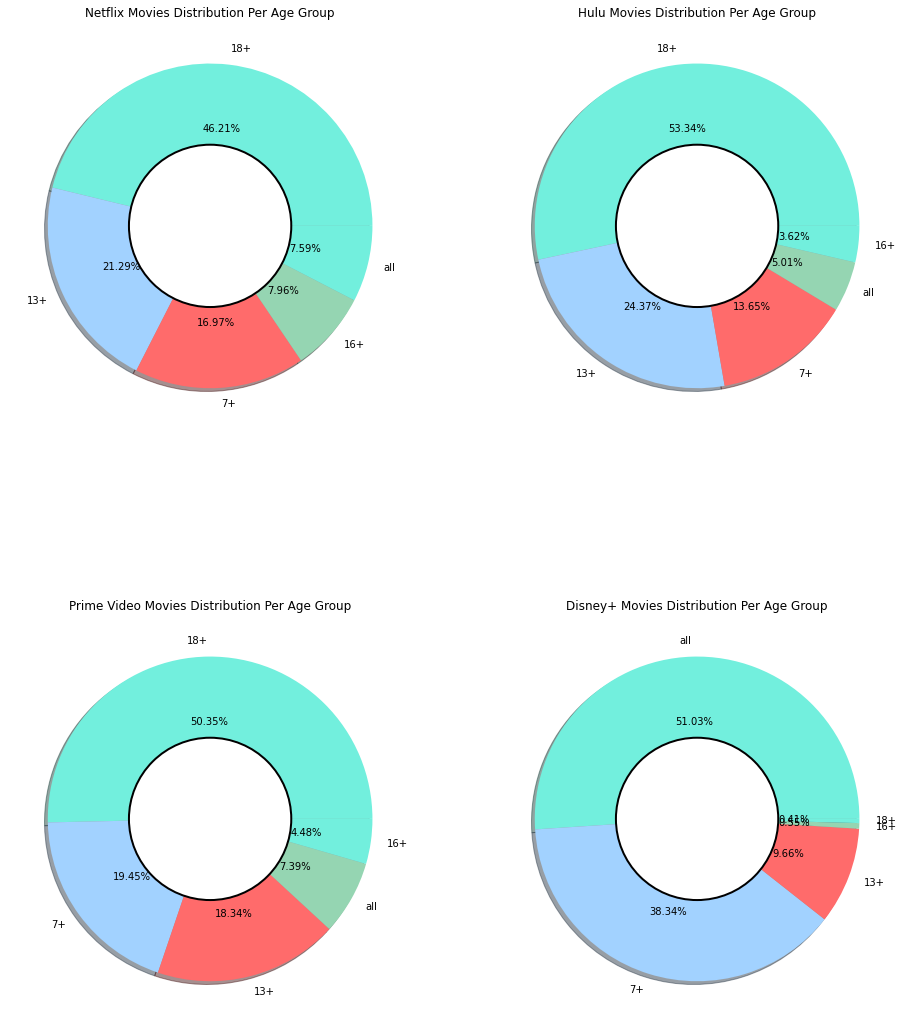

In [20]:
plt.figure(figsize=(16, 20))
donut_plot(221, list(movies_count_per_age[0].values()), list(movies_count_per_age[0].keys()), "Netflix Movies Distribution Per Age Group")
donut_plot(222, list(movies_count_per_age[1].values()), list(movies_count_per_age[1].keys()), "Hulu Movies Distribution Per Age Group")
donut_plot(223, list(movies_count_per_age[2].values()), list(movies_count_per_age[2].keys()), "Prime Video Movies Distribution Per Age Group")
donut_plot(224, list(movies_count_per_age[3].values()), list(movies_count_per_age[3].keys()), "Disney+ Movies Distribution Per Age Group")
plt.show()

# **Kernel Density Estimation Plot**

In [24]:
def kde_plot(splot, i, col_name):
    plt.subplot(splot)
    sns.kdeplot(data=platform_movies_list[i][col_name], color=palette_colors[i],shade=True)
    plt.xlabel(col_name, fontsize = 15)
    plt.legend(fontsize=25)

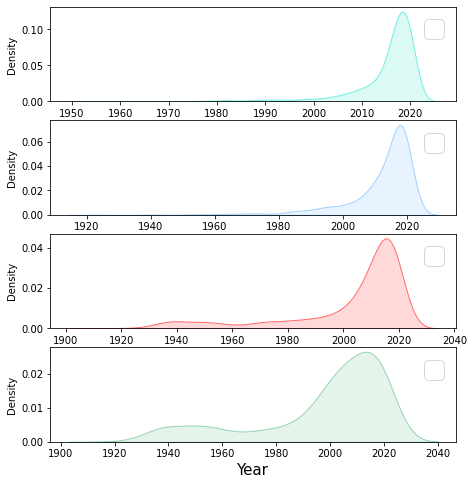

In [22]:
plt.figure(figsize = (16, 8))
kde_plot(421, 0, 'Year')
kde_plot(423, 1, 'Year')
kde_plot(425, 2, 'Year')
kde_plot(427, 3, 'Year')
plt.show()

# **Bar Chart**

In [25]:
movies_df.sort_values(by='Year', ascending=False)[0:500].style.bar(subset=["Netflix"], color=palette_colors[0])\
.bar(subset=["Hulu"], color=palette_colors[1])\
.bar(subset=["Prime Video"], color=palette_colors[2])\
.bar(subset=["Disney+"], color=palette_colors[3])\
.bar(subset=["Year"], color='#').background_gradient(cmap='Purples')

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
825,Thunder Force,2021,13+,65/100,1,0,0,0,0
648,Rurouni Kenshin: The Final,2021,nan,67/100,1,0,0,0,0
7559,Hampton's Legion,2021,nan,42/100,0,0,1,0,0
305,Army of the Dead,2021,18+,75/100,1,0,0,0,0
3929,Willy's Wonderland,2021,18+,69/100,0,1,0,0,0
1548,A Week Away,2021,18+,56/100,1,0,0,0,0
1057,Nayattu,2021,18+,61/100,1,0,0,0,0
3943,Some Kind of Heaven,2021,13+,68/100,0,1,0,0,0
655,Major Grom: Plague Doctor,2021,nan,67/100,1,0,0,0,0
657,Seaspiracy,2021,18+,67/100,1,0,0,0,0


In [26]:
# Descriptive statistics for Age and Rotten Tomatoes Scores
netflix_stats = movies_df[movies_df["Netflix"] == 1]["Age"].describe()
disney_stats = movies_df[movies_df["Disney+"] == 1]["Age"].describe()

netflix_rt_stats = movies_df[movies_df["Netflix"] == 1]["Rotten Tomatoes"].describe()
disney_rt_stats = movies_df[movies_df["Disney+"] == 1]["Rotten Tomatoes"].describe()

print("Netflix Age Stats:\n", netflix_stats)
print("Disney+ Age Stats:\n", disney_stats)
print("Netflix Rotten Tomatoes Stats:\n", netflix_rt_stats)
print("Disney+ Rotten Tomatoes Stats:\n", disney_rt_stats)

Netflix Age Stats:
 count     1898
unique       5
top        18+
freq       877
Name: Age, dtype: object
Disney+ Age Stats:
 count     725
unique      5
top       all
freq      370
Name: Age, dtype: object
Netflix Rotten Tomatoes Stats:
 count       3688
unique        82
top       46/100
freq         122
Name: Rotten Tomatoes, dtype: object
Disney+ Rotten Tomatoes Stats:
 count        922
unique        65
top       48/100
freq          32
Name: Rotten Tomatoes, dtype: object


Netflix Age Restriction Stats:
 18+    877
13+    404
7+     322
16+    151
all    144
Name: Age, dtype: int64
Disney+ Age Restriction Stats:
 all    370
7+     278
13+     70
16+      4
18+      3
Name: Age, dtype: int64


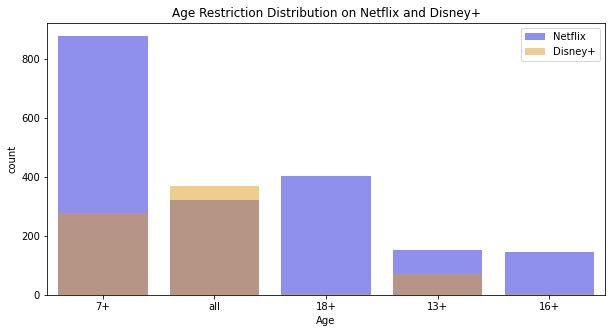

In [27]:
def age_restriction_analysis(df):
    netflix_age = df[df["Netflix"] == 1]["Age"]
    disney_age = df[df["Disney+"] == 1]["Age"]
    
    # Calculating mean, median, and mode (basic statistics)
    netflix_age_stats = netflix_age.value_counts().head()
    disney_age_stats = disney_age.value_counts().head()
    
    print("Netflix Age Restriction Stats:\n", netflix_age_stats)
    print("Disney+ Age Restriction Stats:\n", disney_age_stats)

    # Plotting Age Distribution
    plt.figure(figsize=(10, 5))
    sns.countplot(x="Age", data=df[df["Netflix"] == 1], color="blue", alpha=0.5, label="Netflix")
    sns.countplot(x="Age", data=df[df["Disney+"] == 1], color="orange", alpha=0.5, label="Disney+")
    plt.title("Age Restriction Distribution on Netflix and Disney+")
    plt.legend()
    plt.show()

age_restriction_analysis(movies_df)

Netflix Rotten Tomatoes Stats:
 count    3688.000000
mean       54.447939
std        13.847615
min        10.000000
25%        45.000000
50%        53.000000
75%        63.000000
max        98.000000
Name: Rotten Tomatoes, dtype: float64
Disney+ Rotten Tomatoes Stats:
 count    922.000000
mean      58.312364
std       13.953313
min       10.000000
25%       48.000000
50%       57.500000
75%       67.750000
max       96.000000
Name: Rotten Tomatoes, dtype: float64


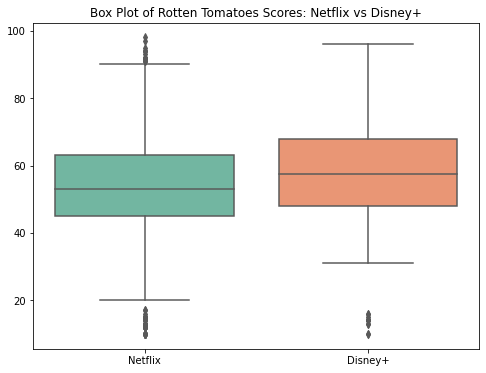

In [28]:
# Rotten Tomatoes Score Analysis with Flexible Parsing
def rotten_tomatoes_analysis(df):
    netflix_rt = df[df["Netflix"] == 1]["Rotten Tomatoes"].dropna()
    disney_rt = df[df["Disney+"] == 1]["Rotten Tomatoes"].dropna()
    
    # Function to clean and convert Rotten Tomatoes scores
    def convert_score(score):
        if isinstance(score, str):
            if "%" in score:
                return float(score.rstrip('%'))  # Convert percentage format to float
            elif "/100" in score:
                return float(score.split('/')[0])  # Convert 'X/100' format to float
        return np.nan  # Return NaN if format is unrecognized
    
    # Applying the conversion function
    netflix_rt = netflix_rt.apply(convert_score)
    disney_rt = disney_rt.apply(convert_score)
    
    # Dropping any remaining NaN values after conversion
    netflix_rt = netflix_rt.dropna()
    disney_rt = disney_rt.dropna()

    # Summary statistics
    print("Netflix Rotten Tomatoes Stats:\n", netflix_rt.describe())
    print("Disney+ Rotten Tomatoes Stats:\n", disney_rt.describe())
    
    # Box Plot Comparison
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=[netflix_rt, disney_rt], palette="Set2")
    plt.xticks([0, 1], ["Netflix", "Disney+"])
    plt.title("Box Plot of Rotten Tomatoes Scores: Netflix vs Disney+")
    plt.show()

# Call the function with your dataset
rotten_tomatoes_analysis(movies_df)

In [29]:
# High-rated vs Low-rated Movies
def high_low_rated_movies(df, threshold=70):
    # Function to clean and convert Rotten Tomatoes scores
    def convert_score(score):
        if isinstance(score, str):
            if "%" in score:
                return float(score.rstrip('%'))  # Convert percentage format to float
            elif "/100" in score:
                return float(score.split('/')[0])  # Convert 'X/100' format to float
        return np.nan  # Return NaN if format is unrecognized
    
    # Apply the conversion to both Netflix and Disney+ scores
    netflix_rt = df[df["Netflix"] == 1]["Rotten Tomatoes"].dropna().apply(convert_score).dropna()
    disney_rt = df[df["Disney+"] == 1]["Rotten Tomatoes"].dropna().apply(convert_score).dropna()
    
    # Count of high-rated and low-rated movies
    netflix_high = netflix_rt[netflix_rt >= threshold].count()
    netflix_low = netflix_rt[netflix_rt < threshold].count()
    disney_high = disney_rt[disney_rt >= threshold].count()
    disney_low = disney_rt[disney_rt < threshold].count()
    
    print(f"Netflix: High-rated Movies (>= {threshold}%): {netflix_high}, Low-rated Movies: {netflix_low}")
    print(f"Disney+: High-rated Movies (>= {threshold}%): {disney_high}, Low-rated Movies: {disney_low}")

# Call the function with your dataset
high_low_rated_movies(movies_df)

Netflix: High-rated Movies (>= 70%): 554, Low-rated Movies: 3134
Disney+: High-rated Movies (>= 70%): 200, Low-rated Movies: 722


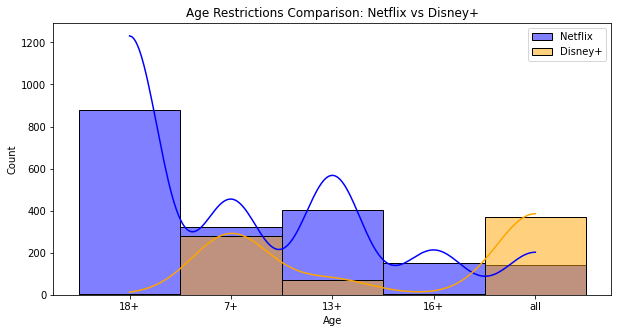

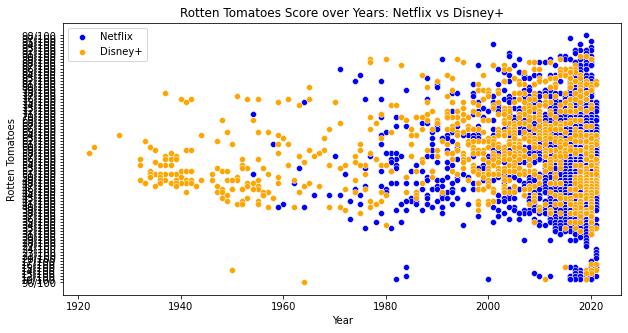

In [30]:
# Comparative histogram for Age Restrictions
plt.figure(figsize=(10, 5))
sns.histplot(movies_df[movies_df["Netflix"] == 1]["Age"], color="blue", label="Netflix", kde=True, alpha=0.5)
sns.histplot(movies_df[movies_df["Disney+"] == 1]["Age"], color="orange", label="Disney+", kde=True, alpha=0.5)
plt.title("Age Restrictions Comparison: Netflix vs Disney+")
plt.legend()
plt.show()

# Scatter plot of Rotten Tomatoes vs Release Year
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Year", y="Rotten Tomatoes", data=movies_df[movies_df["Netflix"] == 1], color="blue", label="Netflix")
sns.scatterplot(x="Year", y="Rotten Tomatoes", data=movies_df[movies_df["Disney+"] == 1], color="orange", label="Disney+")
plt.title("Rotten Tomatoes Score over Years: Netflix vs Disney+")
plt.legend()
plt.show()

In [31]:
# Age Restriction Hypothesis Testing
def hypothesis_test_age_restriction(df):
    netflix_age = df[df["Netflix"] == 1]["Age"].astype("category").cat.codes
    disney_age = df[df["Disney+"] == 1]["Age"].astype("category").cat.codes
    
    # Mann-Whitney U test
    stat, p_value = mannwhitneyu(netflix_age.dropna(), disney_age.dropna(), alternative='two-sided')
    print("Age Restriction Hypothesis Test")
    print("Mann-Whitney U test statistic:", stat)
    print("p-value:", p_value)

hypothesis_test_age_restriction(movies_df)


Age Restriction Hypothesis Test
Mann-Whitney U test statistic: 789448.0
p-value: 1.2067486878804776e-154


In [32]:
from scipy.stats import ttest_ind
import numpy as np

def hypothesis_test_rotten_tomatoes(df):
    # Function to clean and convert Rotten Tomatoes scores
    def convert_score(score):
        if isinstance(score, str):
            if "%" in score:
                return float(score.rstrip('%'))  # Convert percentage format to float
            elif "/100" in score:
                return float(score.split('/')[0])  # Convert 'X/100' format to float
        return np.nan  # Return NaN if format is unrecognized
    
    # Apply the conversion to both Netflix and Disney+ scores
    netflix_rt = df[df["Netflix"] == 1]["Rotten Tomatoes"].dropna().apply(convert_score).dropna()
    disney_rt = df[df["Disney+"] == 1]["Rotten Tomatoes"].dropna().apply(convert_score).dropna()
    
    # Two-sample t-test
    stat, p_value = ttest_ind(netflix_rt, disney_rt, alternative='greater', nan_policy='omit')
    print("Rotten Tomatoes Score Hypothesis Test")
    print("t-test statistic:", stat)
    print("p-value:", p_value)

# Call the function with your dataset
hypothesis_test_rotten_tomatoes(movies_df)

Rotten Tomatoes Score Hypothesis Test
t-test statistic: -7.567567531710881
p-value: 0.9999999999999772
